# Heart Disease Prediction Model Intro

## Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Attribute Information

`Age`: age of the patient [years]<br>
`Sex`: sex of the patient [M: Male, F: Female]<br>
`ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
`RestingBP`: resting blood pressure [mm Hg]<br>
`Cholesterol`: serum cholesterol [mm/dl]<br>
`FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
`RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
`MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]<br>
`ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]<br>
`Oldpeak`: oldpeak = ST [Numeric value measured in depression]<br>
`ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
`HeartDisease`: output class [1: heart disease, 0: Normal]<br>


## Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations<br>
Hungarian: 294 observations<br>
Switzerland: 123 observations<br>
Long Beach VA: 200 observations<br>
Stalog (Heart) Data Set: 270 observations<br>
Total: 1190 observations<br>
Duplicated: 272 observations<br>

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

# Data Checkup

In [266]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Paired')
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

## Importing Data and View Details

In [267]:
heart_init = pd.read_csv('heart_prediction.csv')
heart = heart_init.copy()
display(heart.head())
display(heart.info())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

## Categorical Data Distribution

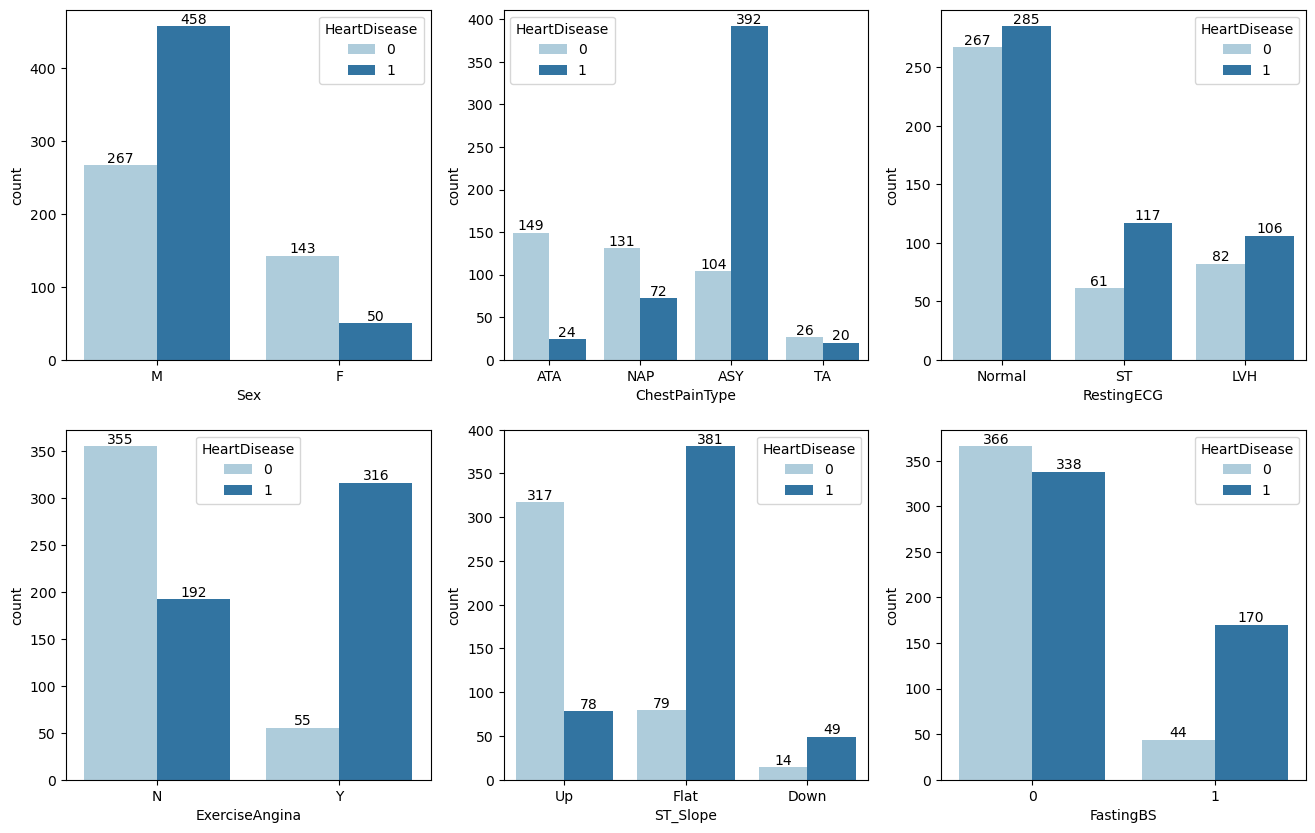

In [268]:
fig, ax = plt.subplots(2,3,figsize=(16,10))
i=0;j=0
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope','FastingBS']:
    sns.countplot(data=heart,x=col,ax=ax[i,j],hue='HeartDisease')
    for label in ax[i,j].containers:
        ax[i,j].bar_label(label)
    j=j+1
    if j==3:i=i+1;j=0

## Numerical Data Distribution

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
mean,53.511,132.397,198.8,0.233,136.809,0.887,0.553
min,28.000,0.000,0.0,0.000,60.000,-2.600,0.000
max,77.000,200.000,603.0,1.000,202.000,6.200,1.000


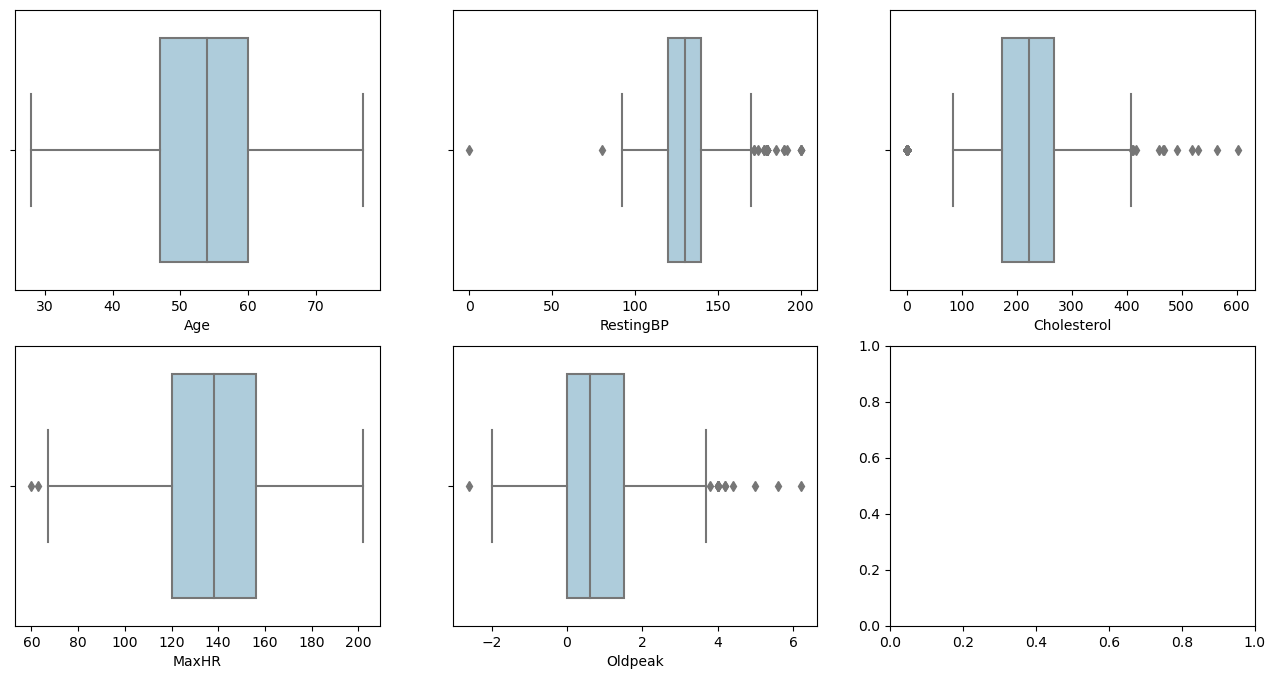

In [269]:
display(heart.describe().loc[['mean','min','max']].round(3))
fig, ax = plt.subplots(2,3,figsize=(16,8))
i=0;j=0
for col in heart.select_dtypes(exclude='object').drop(columns=['HeartDisease','FastingBS']).columns:
    sns.boxplot(data=heart,x=col,ax=ax[i,j])
    j=j+1
    if j==3:i=i+1;j=0

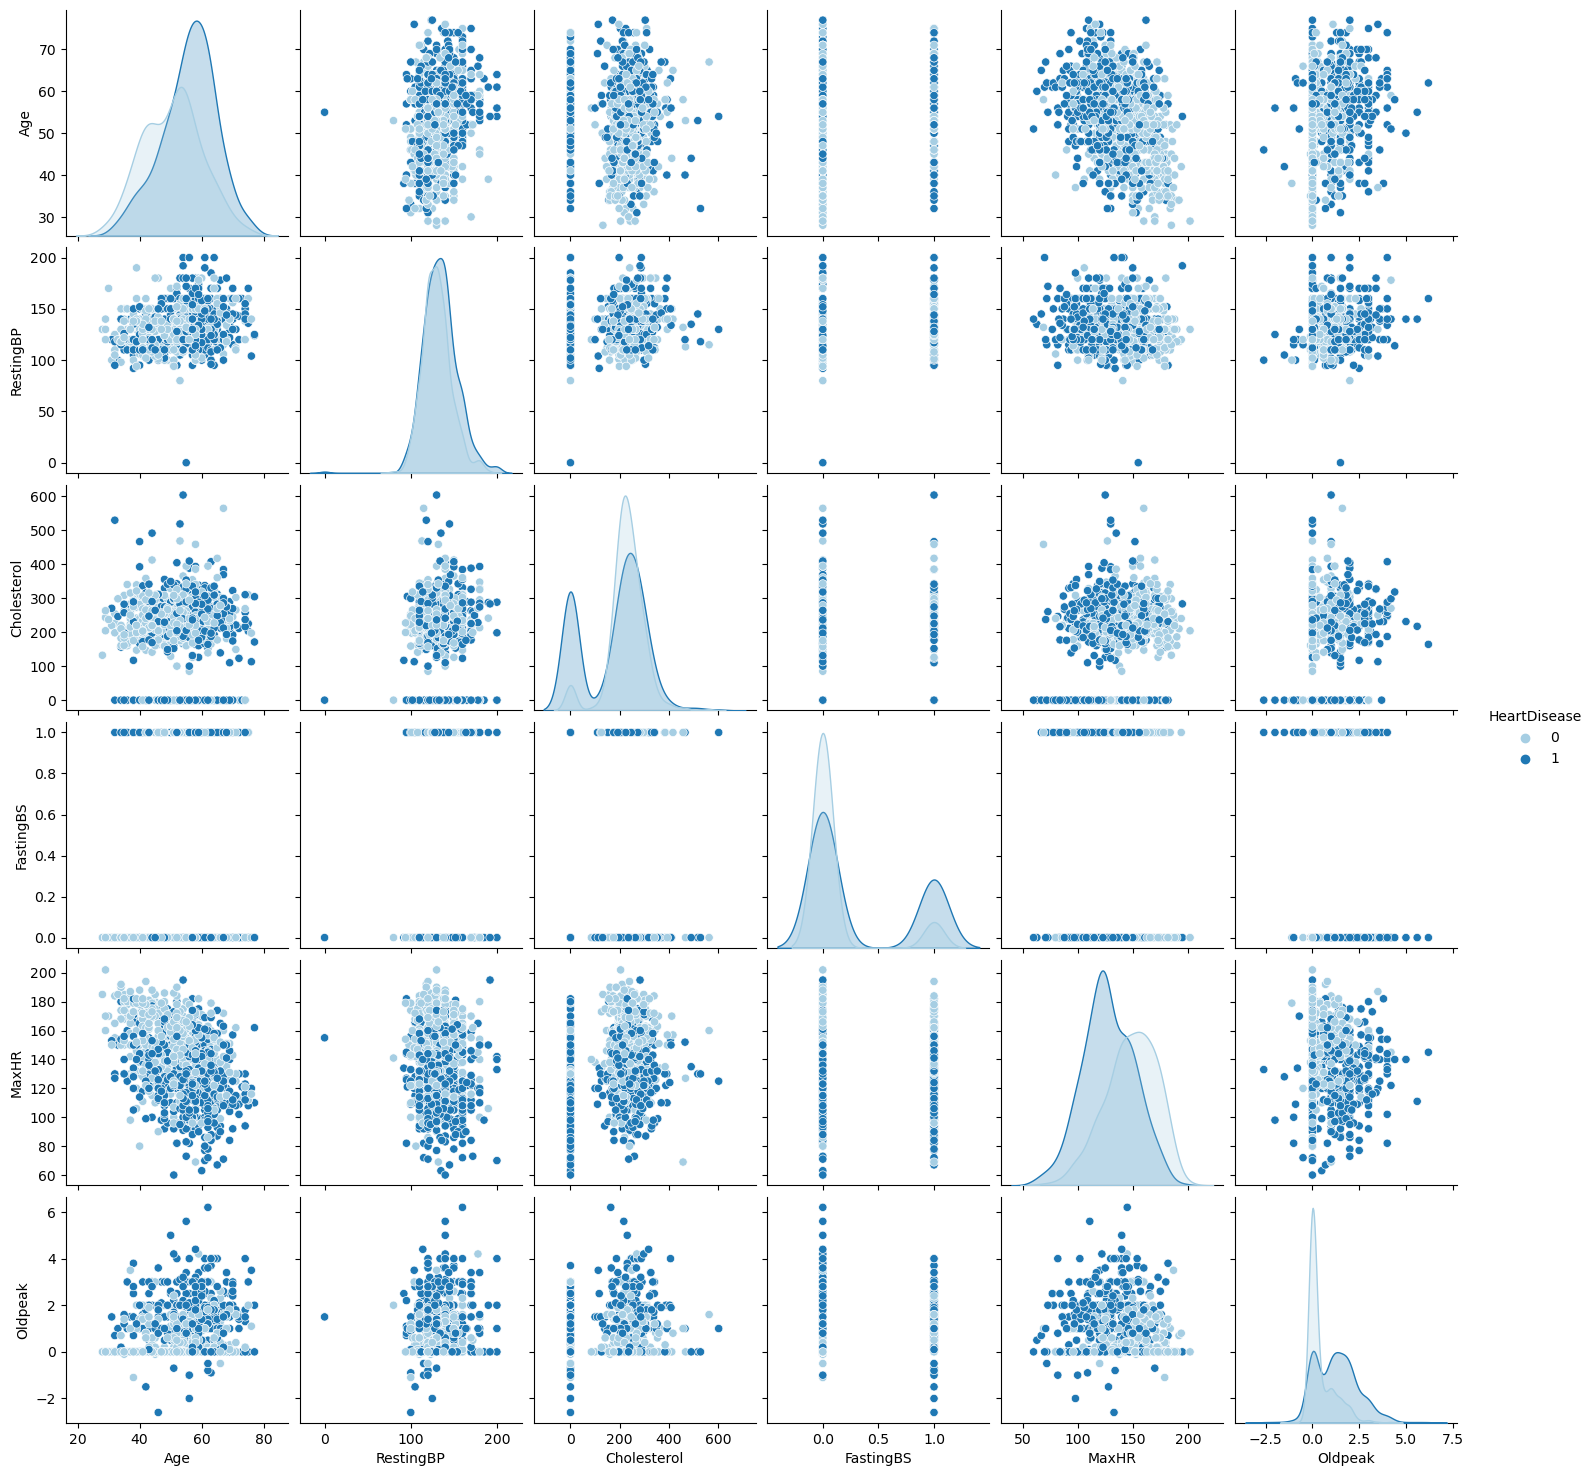

In [270]:
sns.pairplot(heart,hue='HeartDisease')

# Data Preprocessing
## One Hotcode Encoding

In [271]:
heart['Sex'] = heart['Sex'].replace(['M','F'],[0,1])
heart['ExerciseAngina'] = heart['ExerciseAngina'].replace(['N','Y'],[0,1])
heart = pd.get_dummies(heart)
display(heart.head())
display(heart.info())

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,1,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,0,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,1,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,0,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ASY  918 non-null    bool   
 10  ChestPainType_ATA  918 non-null    bool   
 11  ChestPainType_NAP  918 non-null    bool   
 12  ChestPainType_TA   918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ST_Slope_Down      918 non

None

## Correlation

<Axes: >

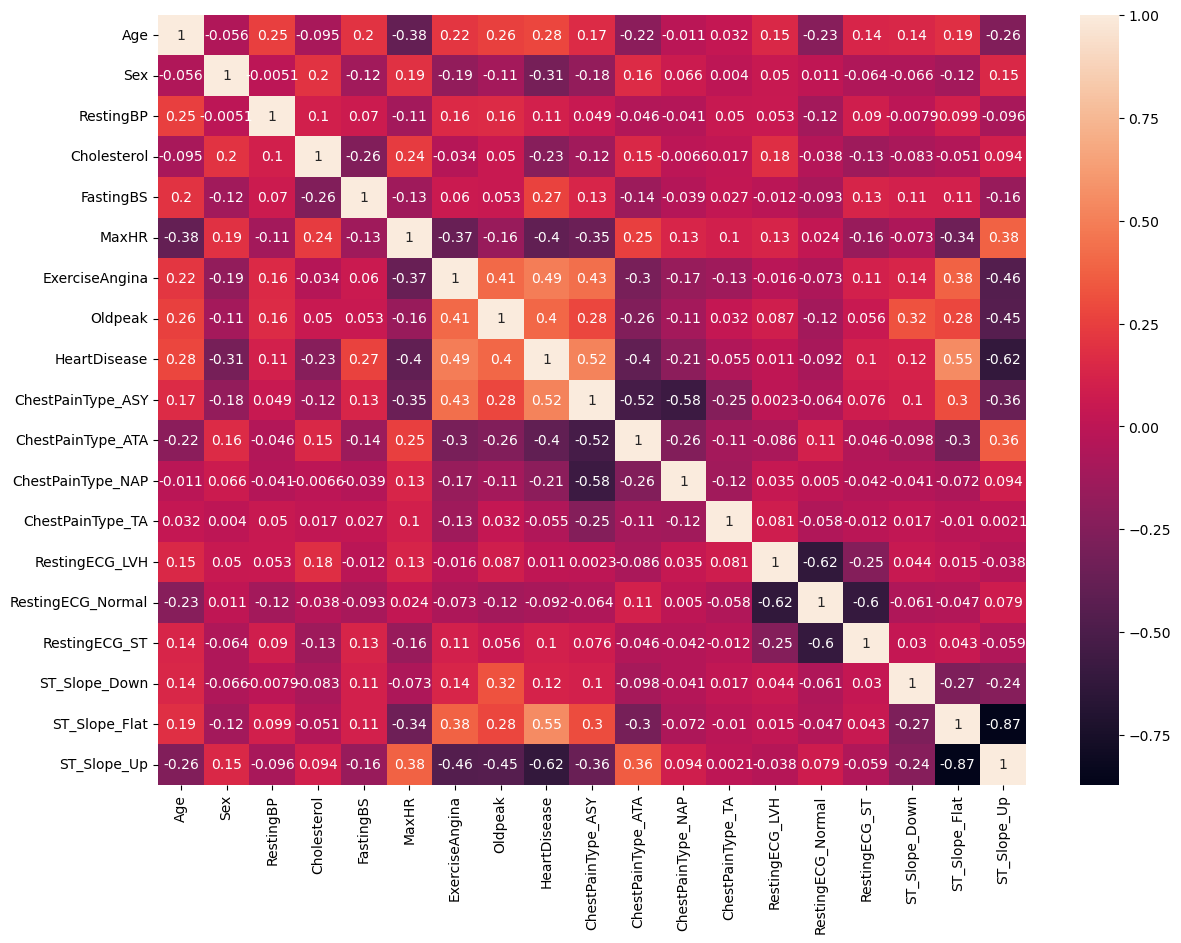

In [272]:
plt.figure(figsize=(14,10))
sns.heatmap(heart.select_dtypes(exclude='object').corr(),annot=True)

## Spliting Train-Test Data and Stadarized

In [273]:
X = heart.drop(columns='HeartDisease').values
y = heart['HeartDisease'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=69)

# Prediction Model: K-Nearest Neighbors
## Hypertuning Params

In [274]:
classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [10, 30, 50],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}
model = RandomizedSearchCV(estimator=classifier, param_distributions=param_grid, cv=10, n_iter=20,random_state=69,n_jobs=-1)
model.fit(X_train,y_train)
display(model.best_params_)
print('Model Best Score:',model.best_score_)

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 11,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'kd_tree'}

Model Best Score: 0.8651425398000739


## Running Model And Evaluating Score

In [275]:
knn = KNeighborsClassifier(weights= 'uniform',p= 1,n_neighbors= 11,metric= 'minkowski',leaf_size= 30,algorithm= 'kd_tree')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)

cls_rep = classification_report(y_test, knn_pred)
cnf_mat = confusion_matrix(y_test, knn_pred)

print(f"""{cls_rep}
Confusion Matrix:
{cnf_mat}""")

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        78
           1       0.88      0.87      0.88       106

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Confusion Matrix:
[[66 12]
 [14 92]]


## ROC-AUC Curve and Score

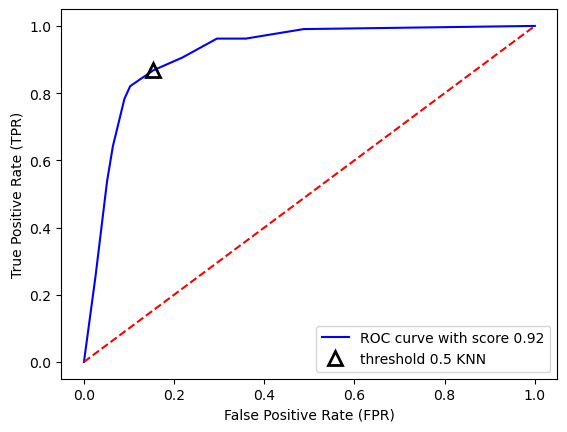

In [276]:
fpr_knn, tpr_knn, thresholds_Knn = roc_curve(y_test,  knn_pred_proba[:, 1])
roc_auc_knn = roc_auc_score(y_test, knn_pred_proba[:, 1])

plt.plot(fpr_knn, tpr_knn, color='blue',label=f"ROC curve with score {roc_auc_knn.round(2)}")
close_default_knn = np.argmin(np.abs(thresholds_Knn - 0.5))
plt.plot(fpr_knn[close_default_knn], tpr_knn[close_default_knn], '^', markersize=10, label="threshold 0.5 KNN", fillstyle="none", c='k', mew=2)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()

# Prediction Model: Gradiant Boosting Classifier
## Hypertuning Params

In [277]:
classifier = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}
model = RandomizedSearchCV(estimator=classifier, param_distributions=param_grid, cv=10, n_iter=20,random_state=69,n_jobs=-1)
model.fit(X_train,y_train)
display(model.best_params_)
print('Model Best Score:',model.best_score_)

{'subsample': 0.9,
 'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 3,
 'learning_rate': 0.1}

Model Best Score: 0.8692891521658644


## Running Model And Evaluating Score

In [278]:
gb = GradientBoostingClassifier(subsample= 0.9,n_estimators= 50,min_samples_split= 10,min_samples_leaf= 1,max_depth= 3,learning_rate= 0.1)
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
gb_pred_proba = gb.predict_proba(X_test)

cls_rep = classification_report(y_test, gb_pred)
cnf_mat = confusion_matrix(y_test, gb_pred)

print(f"""{cls_rep}
Confusion Matrix:
{cnf_mat}""")

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        78
           1       0.90      0.89      0.90       106

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Confusion Matrix:
[[68 10]
 [12 94]]


## ROC-AUC Curve and Score

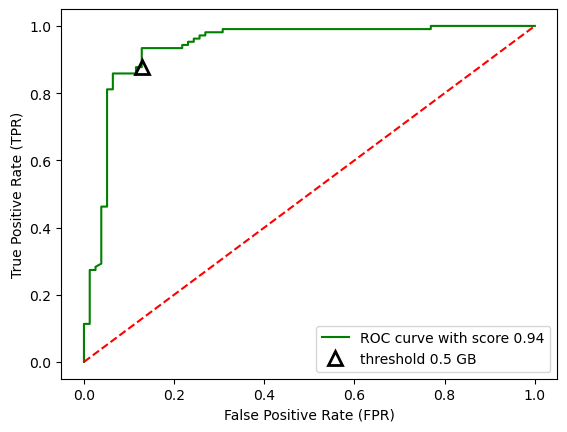

In [279]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test,  gb_pred_proba[:, 1])
roc_auc_gb = roc_auc_score(y_test, gb_pred_proba[:, 1])

plt.plot(fpr_gb, tpr_gb, color='green',label=f"ROC curve with score {roc_auc_gb.round(2)}")
close_default_gb = np.argmin(np.abs(thresholds_gb - 0.5))
plt.plot(fpr_gb[close_default_gb], tpr_gb[close_default_gb], '^', markersize=10, label="threshold 0.5 GB", fillstyle="none", c='k', mew=2)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()

In [296]:
heart_init.iloc[420,:]

Age                 66
Sex                  M
ChestPainType      NAP
RestingBP          110
Cholesterol        213
FastingBS            1
RestingECG         LVH
MaxHR               99
ExerciseAngina       Y
Oldpeak            1.3
ST_Slope          Flat
HeartDisease         0
Name: 420, dtype: object

# Prediciting New Data

In [297]:
# Age in years
Age = 66
# Male=0, Female=1
Sex = 0 
# resting blood pressure [mm Hg]
RestingBP = 110 
# serum cholesterol [mm/dl]
Cholesterol = 213 
# 1: if FastingBS > 120 mg/dl, 0: otherwise
FastingBS = 1 
# maximum heart rate achieved [Numeric value between 60 and 202]
MaxHR = 99 
# No=0, Yes=1
ExerciseAngina = 1 
# Numeric value measured in depression
Oldpeak = 1.3 
# TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
# ChestPain Type = 1 if that's the ChestPain type else 0.
ChestPainType_ASY = 0
ChestPainType_ATA = 0
ChestPainType_NAP = 1
ChestPainType_TA = 0
# Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
# LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
# RestingECG = 1 if that's the RestingECG else 0.
RestingECG_LVH = 1
RestingECG_Normal = 0
RestingECG_ST = 0
# Up: upsloping, Flat: flat, Down: downsloping
# ST_Slope = 1 if that's the ST_Slope else 0.
ST_Slope_Down = 0
ST_Slope_Flat = 1
ST_Slope_Up = 0



X_new = [[Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR,
       ExerciseAngina, Oldpeak, ChestPainType_ASY,
       ChestPainType_ATA, ChestPainType_NAP, ChestPainType_TA,
       RestingECG_LVH, RestingECG_Normal, RestingECG_ST, ST_Slope_Down,
       ST_Slope_Flat, ST_Slope_Up]]
X_new_scaled = scaler.transform(X_new)
result = gb.predict(X_new)
result_proba = gb.predict_proba(X_new)
result_out = 'No' if(result==0) else 'Yes'
result_proba_out = result_proba[0,0]*100 if(result==0) else result_proba[0,1]*100
print(f'Heart Diseas Possibility: {result_out}\nProbability: {result_proba_out.round(2)}%')

Heart Diseas Possibility: No
Probability: 78.66%
